# **Regression example**

This Jupyter Notebook contains a basic example of regression with linear regression, random forest and a deep neural network. The dataset we will use is the insurance dataset, which contains information about individuals and their medical insurance costs. We will preprocess the data, visualize it, and train different models on it. Finally, we will evaluate the models and compare their performance. First, we install Pytorch Lightning, which will be used as an easy-to-use interface to PyTorch.

In [1]:
!pip install pytorch-lightning --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 17.8 MB/s eta 0:00:00


In [2]:
# Download the Dataset

!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2023-10-31 22:21:41--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2023-10-31 22:21:42 (4.23 MB/s) - ‘insurance.csv’ saved [54288/54288]



In [3]:
# Importing libraries for data preprocessing & visualization:

In [4]:
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for linear algebra
import matplotlib.pyplot as plt # matplotlib for plotting
import seaborn as sns # seaborn for plotting

## DATA PREPROCESSING AND VISUALIZATION

A `df` dataframe is created by reading the contents of the \"insurance.csv\" file using pandas `read_csv()` method. The \"insurance.csv\" file contains information about individuals and their medical insurance costs. The `df` dataframe contains 1338 rows and 7 columns. Each row represents an individual and each column represents a feature of that individual such as age, sex, bmi, number of children, smoker or not, region and charges.

In [5]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have the column names already. There are no 'NaN' values in any of the columns.

The categorical columns contains strings, which have to convert to one-hot vectors. Fortunately, we can easily do this with pandas:

In [7]:
df = pd.get_dummies(df, drop_first=True) # we have to talk about drop_first -> avoid the dummy variable trap
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [8]:
df.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [9]:
df.iloc[:, :4] = df.iloc[:, :4].astype('float32')

<ipython-input-9-890d8b6fbeb9>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, :4] = df.iloc[:, :4].astype('float32')


In [10]:
df.dtypes

age                 float32
bmi                 float32
children            float32
charges             float32
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

The following part generates a "heatmap" of pairwise correlations between the features in the df dataframe. The sns.heatmap() function from the seaborn library is used to create the heatmap. The annot=True parameter adds the correlation values to the heatmap.

Pairwise correlation is a measure of the linear relationship between two variables. In the context of linear regression, pairwise correlation is important because it helps us understand how each feature is related to the target variable. If two features are highly correlated, it means that they are providing similar information to the model, which can lead to overfitting. On the other hand, if two features are not correlated, it means that they are providing different information to the model, which can improve the model's performance. Therefore, it is important to check the pairwise correlations between the features before training a linear regression model.

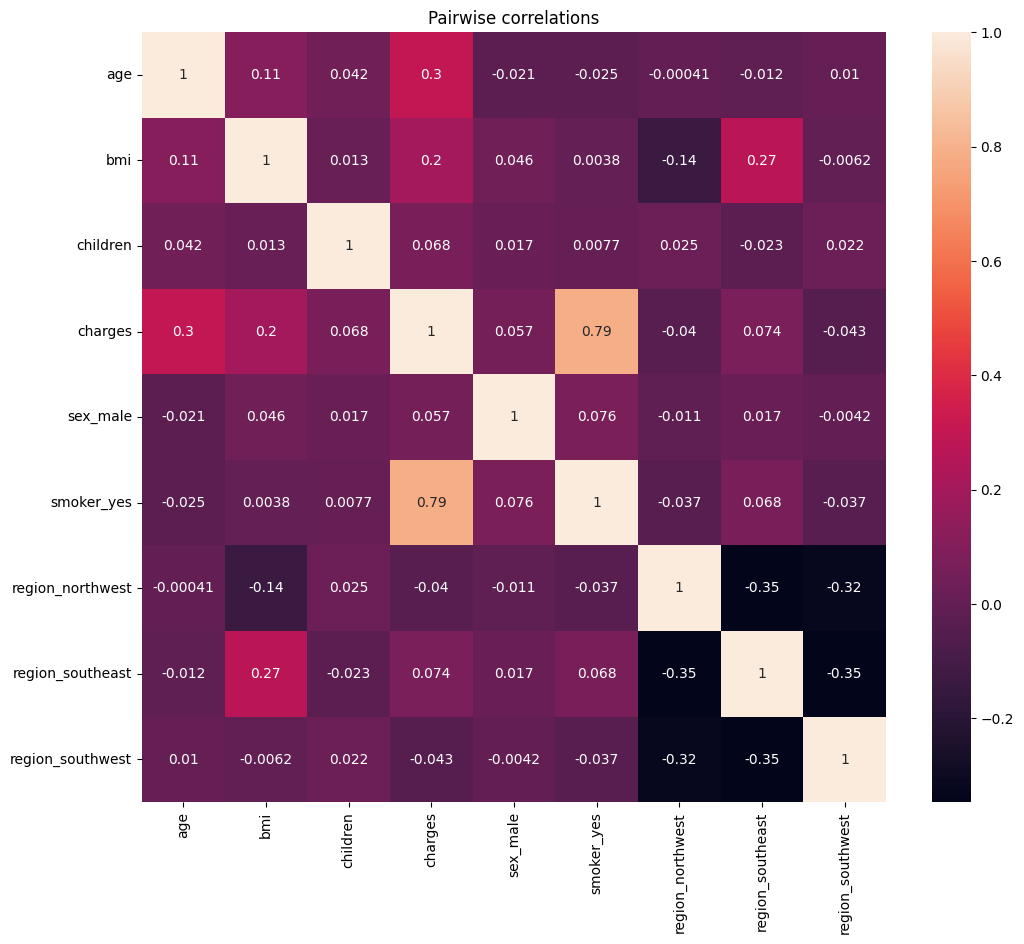

In [11]:
plt.figure(figsize=(12, 10))
plt.title('Pairwise correlations')
sns.heatmap(data=df.corr(), annot=True)
plt.show()

## Training linear regression and random forest regressors


We split the features and the target variable:



In [12]:
X = df.drop(columns=['charges']).values # features
y = df['charges'].values # label


Now we split the dataset into train and test sets, and train linear regression and random forest regressors on the test set.

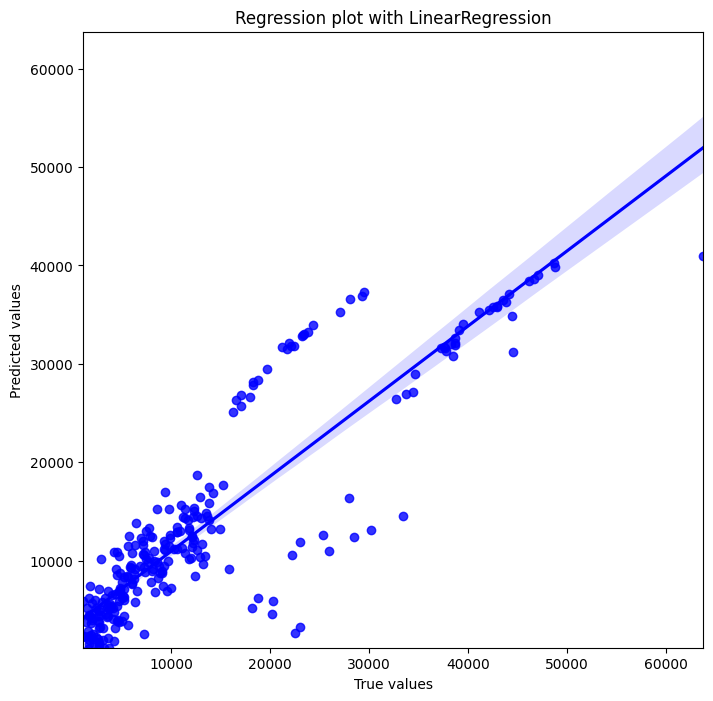

Mean absolute error: 4181.1943359375
Coefficient of determination: 0.7835929900543285


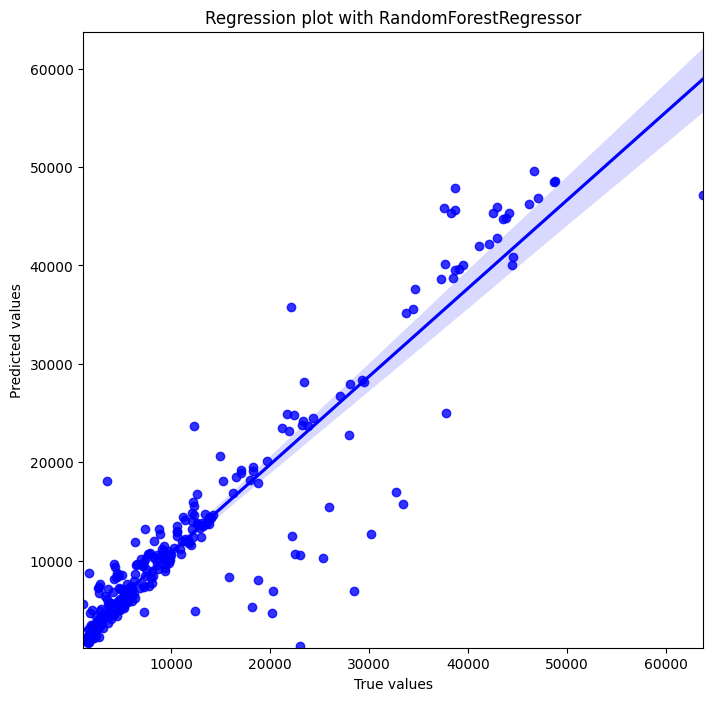

Mean absolute error: 2536.7524659319065
Coefficient of determination: 0.8660305392834688


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # alternative: min-max scaling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

for model in [LinearRegression(), RandomForestRegressor()]:
  model.fit(scaler.transform(X_train), y_train)
  y_pred = model.predict(scaler.transform(X_test))
  np.save(model.__class__.__name__, y_pred)
  # regression plot
  plt.figure(figsize=(8, 8))
  sns.regplot(x=y_test, y=y_pred, scatter=True, color='b')
  plt.xlabel("True values")
  plt.ylabel("Predicted values")
  plt.xlim(min(y_test), max(y_test))
  plt.ylim(min(y_test), max(y_test))
  plt.title(f"Regression plot with {model.__class__.__name__}")
  plt.show()
  # evaluation
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Mean absolute error: {mae}")
  r2 = r2_score(y_test, y_pred)
  print(f"Coefficient of determination: {r2}")


# **ASSIGNMENT: Regression with neural network**



1.   Create and train a FeedForward Neural Network with PyTorch Lightning. Use ModelCheckPoint as callback, and save the best performing model (in terms of MAE) into a ckpt file named best_model.ckpt. 50 points

2.   Save the MAE and the R2 score of your best performing model into a csv file called mlp_results.csv. The MAE must be lower and the R2 score must be higher than in linear regression. 20 points.

3. Ensemble your neural network model with RandomForestRegressor following the formula

y_pred_ensemble = 0.5 * y_pred_FeedForwardNet + 0.5 * y_pred_RandomForestRegressor.

Save the MAE and the R2 score of the ensemble into a csv file called ensemble_results.csv. 30 points

Besides the Python codes / IPYNB, the CSV files must be saved directly into the git repository you submit.

In [14]:
! pip install torchensemble

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.3 MB/s eta 0:00:00


## 1. Create and train a FeedForward Neural Network with PyTorch Lightning. Use ModelCheckPoint as callback, and save the best performing model (in terms of MAE) into a ckpt file named best_model.ckpt. 50 points

In [15]:
import torch
import torch.nn.functional as F
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from torch.utils.data import DataLoader, TensorDataset


In [16]:
# Convert datasets to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Create DataLoader for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [17]:
# We Define a FeedForward Neural Network using the PyTorch Lightning framework
class LightningFeedForward(pl.LightningModule):

    def __init__(self, input_dim=None):
        super(LightningFeedForward, self).__init__()

        if input_dim is not None:
            self.save_hyperparameters("input_dim")

        self.fc1 = torch.nn.Linear(self.hparams.input_dim, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = F.mse_loss(y_pred.view_as(y), y)  # Ensure y_pred and y have the same shape
        mae = F.l1_loss(y_pred.view_as(y), y)    # Calculate MAE
        self.log('train_mae', mae)               # Log MAE for ModelCheckpoint to monitor
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)


In [28]:
# Create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(monitor='train_mae',
                                      filename='best_model',
                                      save_top_k=1,
                                      mode='min')

# Initialize the model and trainer
model = LightningFeedForward(X_train.shape[1])
trainer = pl.Trainer(max_epochs=300, callbacks=[checkpoint_callback])

# Train the model
trainer.fit(model, train_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 1.2 K 
1 | fc2  | Linear | 8.3 K 
2 | fc3  | Linear | 65    
--------------------------------
9.5 K     Trainable params
0         Non-trainable params
9.5 K     Total params
0.038     Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/di

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.


In [29]:
import os
print(os.listdir("."))

['.config', 'LinearRegression.npy', 'RandomForestRegressor.npy', 'lightning_logs', 'insurance.csv', 'sample_data']


In [30]:
print(os.listdir("lightning_logs/"))


['version_0', 'version_1']


In [31]:
print(os.listdir("lightning_logs/version_1"))


['hparams.yaml', 'events.out.tfevents.1698791827.17ac41aaa3a0.353.1', 'checkpoints']


In [32]:
print(os.listdir("lightning_logs/version_1/checkpoints"))


['best_model.ckpt']


In [33]:
# Load the best model from the checkpoint
best_model_path = "lightning_logs/version_1/checkpoints/best_model.ckpt"
best_model = LightningFeedForward.load_from_checkpoint(checkpoint_path=best_model_path)

# Switch model to evaluation mode
best_model.eval()

# Evaluate the model on the test set
with torch.no_grad():
    test_predictions = best_model(torch.tensor(X_test, dtype=torch.float32))
    test_mae = F.l1_loss(test_predictions.view_as(torch.tensor(y_test)), torch.tensor(y_test)).item()

print(f"Test MAE for the best neural network model: {test_mae}")


Test MAE for the best neural network model: 3588.719482421875


## 2. Save the MAE and the R2 score of your best performing model into a csv file called mlp_results.csv. The MAE must be lower and the R2 score must be higher than in linear regression. 20 points.

In [34]:
from sklearn.metrics import mean_absolute_error

# Load the predictions from saved files
y_pred_lr = np.load('LinearRegression.npy')
y_pred_rf = np.load('RandomForestRegressor.npy')

# Calculate the MAEs
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"MAE for Linear Regression: {mae_lr}")
print(f"MAE for Random Forest: {mae_rf}")
print(f"MAE for Feedforward Neural Network: {test_mae}")


MAE for Linear Regression: 4181.1943359375
MAE for Random Forest: 2536.7524659319065
MAE for Feedforward Neural Network: 3588.719482421875


In [35]:
from sklearn.metrics import r2_score

# Using previously loaded best model and its evaluation on test set
test_r2 = r2_score(y_test, test_predictions.numpy())


In [39]:
# Calculate R2 score for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)

if test_mae < mae_lr and test_r2 > r2_lr:
    print("Neural network meets the criteria :)")
else:
    print("Neural network does not meet the criteria.")


Neural network meets the criteria :)


In [40]:
# You already have the predictions from the Linear Regression model: y_pred_lr

# Calculate R2 score for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate R2 score for the Neural Network
r2_nn = r2_score(y_test, test_predictions.numpy())

print(f"R^2 Score for Linear Regression: {r2_lr}")
print(f"R^2 Score for Neural Network: {r2_nn}")

if r2_nn > r2_lr:
    print("Neural network's R^2 score is higher than Linear Regression :)")
else:
    print("Neural network's R^2 score is not higher than Linear Regression :( )")


R^2 Score for Linear Regression: 0.7835929900543285
R^2 Score for Neural Network: 0.7952577232516375
Neural network's R^2 score is higher than Linear Regression :)


In [44]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    "Model": ["Feedforward Neural Network"],
    "MAE": [test_mae],
    "R2 Score": [test_r2]
})

# Save to CSV
results_df.to_csv("mlp_results.csv", index=False)

In [45]:
import os
print(os.listdir("."))

['.config', 'LinearRegression.npy', 'RandomForestRegressor.npy', 'lightning_logs', 'mlp_results.csv', 'insurance.csv', 'sample_data']


In [46]:
import pandas as pd

# Load the CSV file
results_df = pd.read_csv("mlp_results.csv")
print(results_df)


                        Model          MAE  R2 Score
0  Feedforward Neural Network  3588.719482  0.795258


## Ensemble your neural network model with RandomForestRegressor following the formula

y_pred_ensemble = 0.5 * y_pred_FeedForwardNet + 0.5 * y_pred_RandomForestRegressor.

Save the MAE and the R2 score of the ensemble into a csv file called ensemble_results.csv. 30 points

In [47]:
# Load the predictions

y_pred_rf = np.load("RandomForestRegressor.npy")


In [48]:
# Ensemble the predictions

y_pred_ensemble = 0.5 * test_predictions.numpy().squeeze() + 0.5 * y_pred_rf


In [49]:
# Evaluate the ensemble

ensemble_mae = mean_absolute_error(y_test, y_pred_ensemble)
ensemble_r2 = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble MAE: {ensemble_mae}")
print(f"Ensemble R^2 Score: {ensemble_r2}")


Ensemble MAE: 2847.200015656201
Ensemble R^2 Score: 0.8630134175517992


In [51]:
# Saving results

# Create a DataFrame to store the ensemble results
ensemble_results_df = pd.DataFrame({
    "Model": ["Ensemble of Neural Network and RandomForest"],
    "MAE": [ensemble_mae],
    "R2 Score": [ensemble_r2]
})

# Save to CSV
ensemble_results_df.to_csv("ensemble_results.csv", index=False)


In [52]:
import os
print(os.listdir("."))

['.config', 'LinearRegression.npy', 'RandomForestRegressor.npy', 'ensemble_results.csv', 'lightning_logs', 'mlp_results.csv', 'insurance.csv', 'sample_data']
